# 3.7.1 Скин-эффект в полом цилиндре

Коэффиценты прямой: k, s_k, b, s_b
0.16697779931339377	0.00024738861123697203	4726.555391767211	15.00003552892951
Проводимость 2.31E+07
const 68.75
s_sigma = 0.004040620962773178


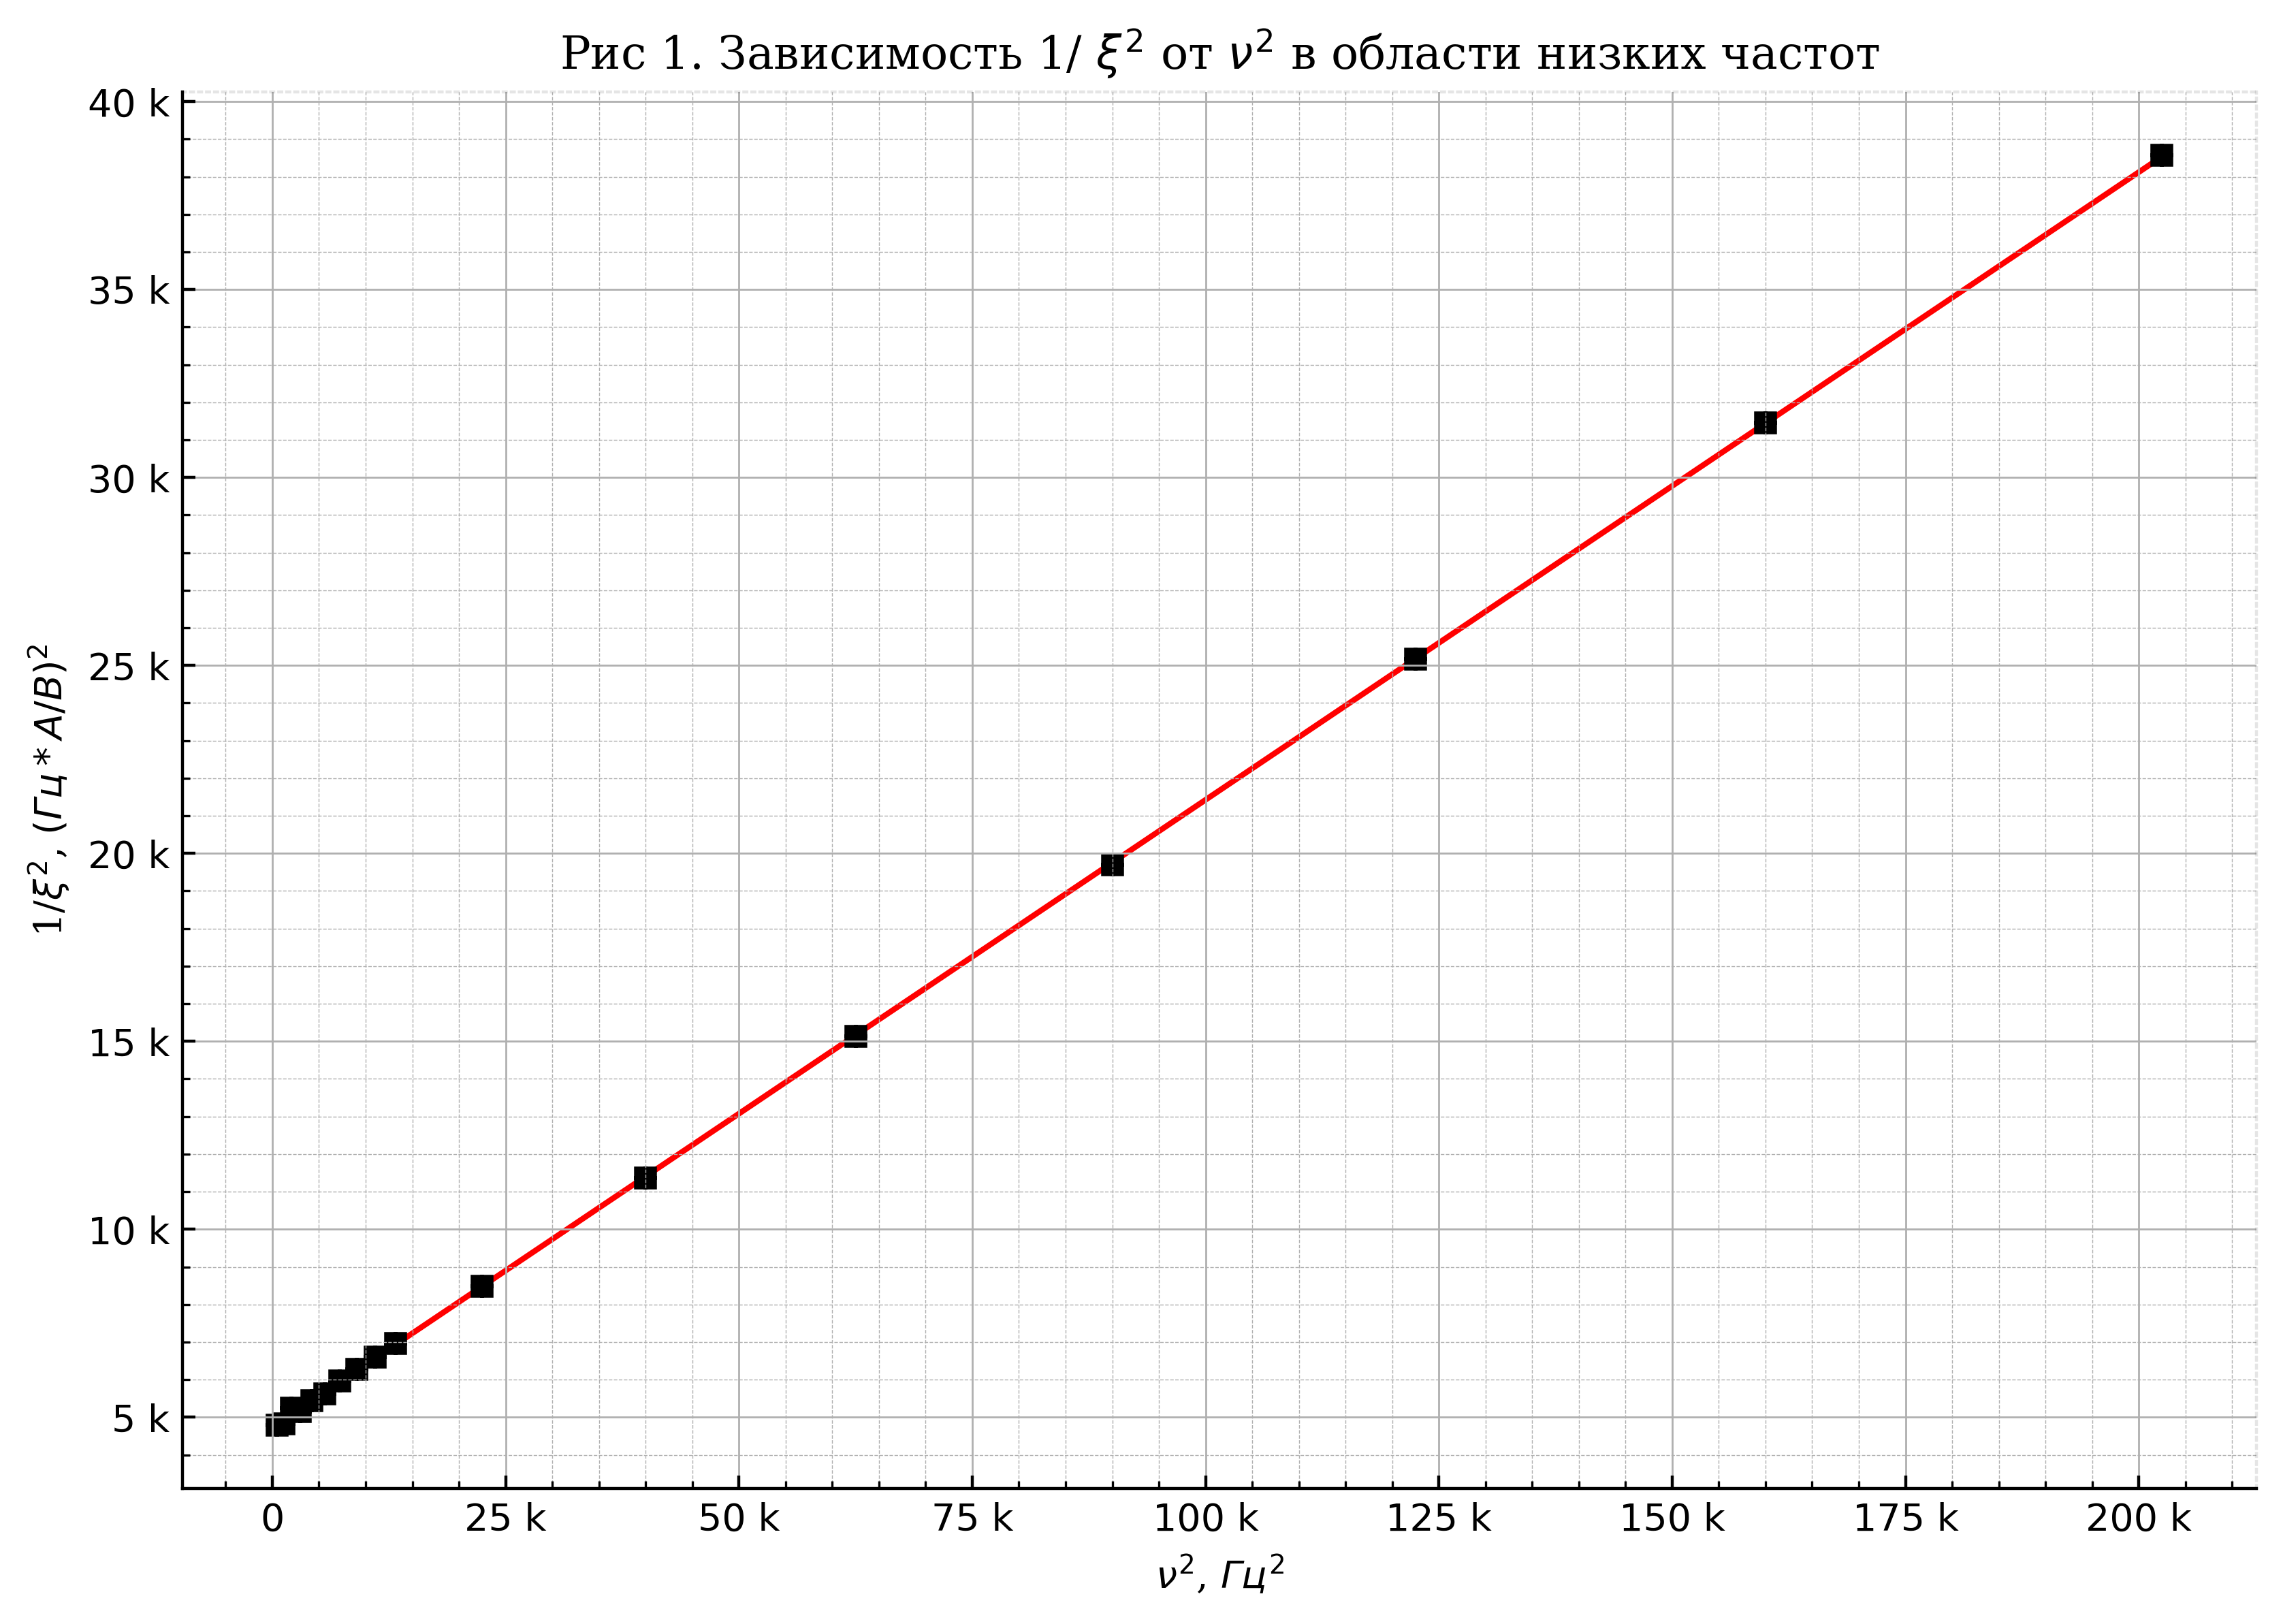

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mygraph as mg
import pandas as pd
from matplotlib.ticker import EngFormatter

df = pd.read_csv('3.tsv', sep='\t')

ksi = df['U, V'] / df['v, Hz'] / df['I, mA'] * 1e3
Y = np.array( 1/ksi/ksi )
X = np.array( df['v, Hz']**2 )

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
formatter1 = EngFormatter(places=0) 
ax.xaxis.set_major_formatter(formatter1)
ax.yaxis.set_major_formatter(formatter1)
mg.set_grids(fig)
mg.set_title(ax, r'Зависимость 1/ $ \xi^2 $ от $\nu^2$ в области низких частот')
mg.set_label(ax, r'$\nu^2$, $Гц^2$', r'1/$\xi^2$, $(Гц*A/B)^2$')

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y)
mg.display_linls(ax)

B = k / b
C = np.sqrt(B)
a = (45-1.5)*1e-3
h = 1.5e-3
u0 = 4*np.pi*1e-7
sigma = C / np.pi / a / h / u0
print(f'Проводимость {sigma:.2E}')
print(f'const {np.sqrt(b):.2f}')

alpha = 1/np.pi/a/h/u0
s_sigma = np.sqrt(
    np.square( alpha*s_k/(2*np.sqrt(b)*np.sqrt(k)) ) +
    np.square( alpha*np.sqrt(k)*s_b/(2*np.sqrt(b*b*b)) )
)
print(f's_sigma = {s_sigma/1e7}')

Коэффиценты прямой: k, s_k, b, s_b
0.010647806935893431	0.0006043290445338572	-1.1245369707452295	0.1383835113160087
Проводимость 4.13E+07
s_sigma = 0.23460281264986005


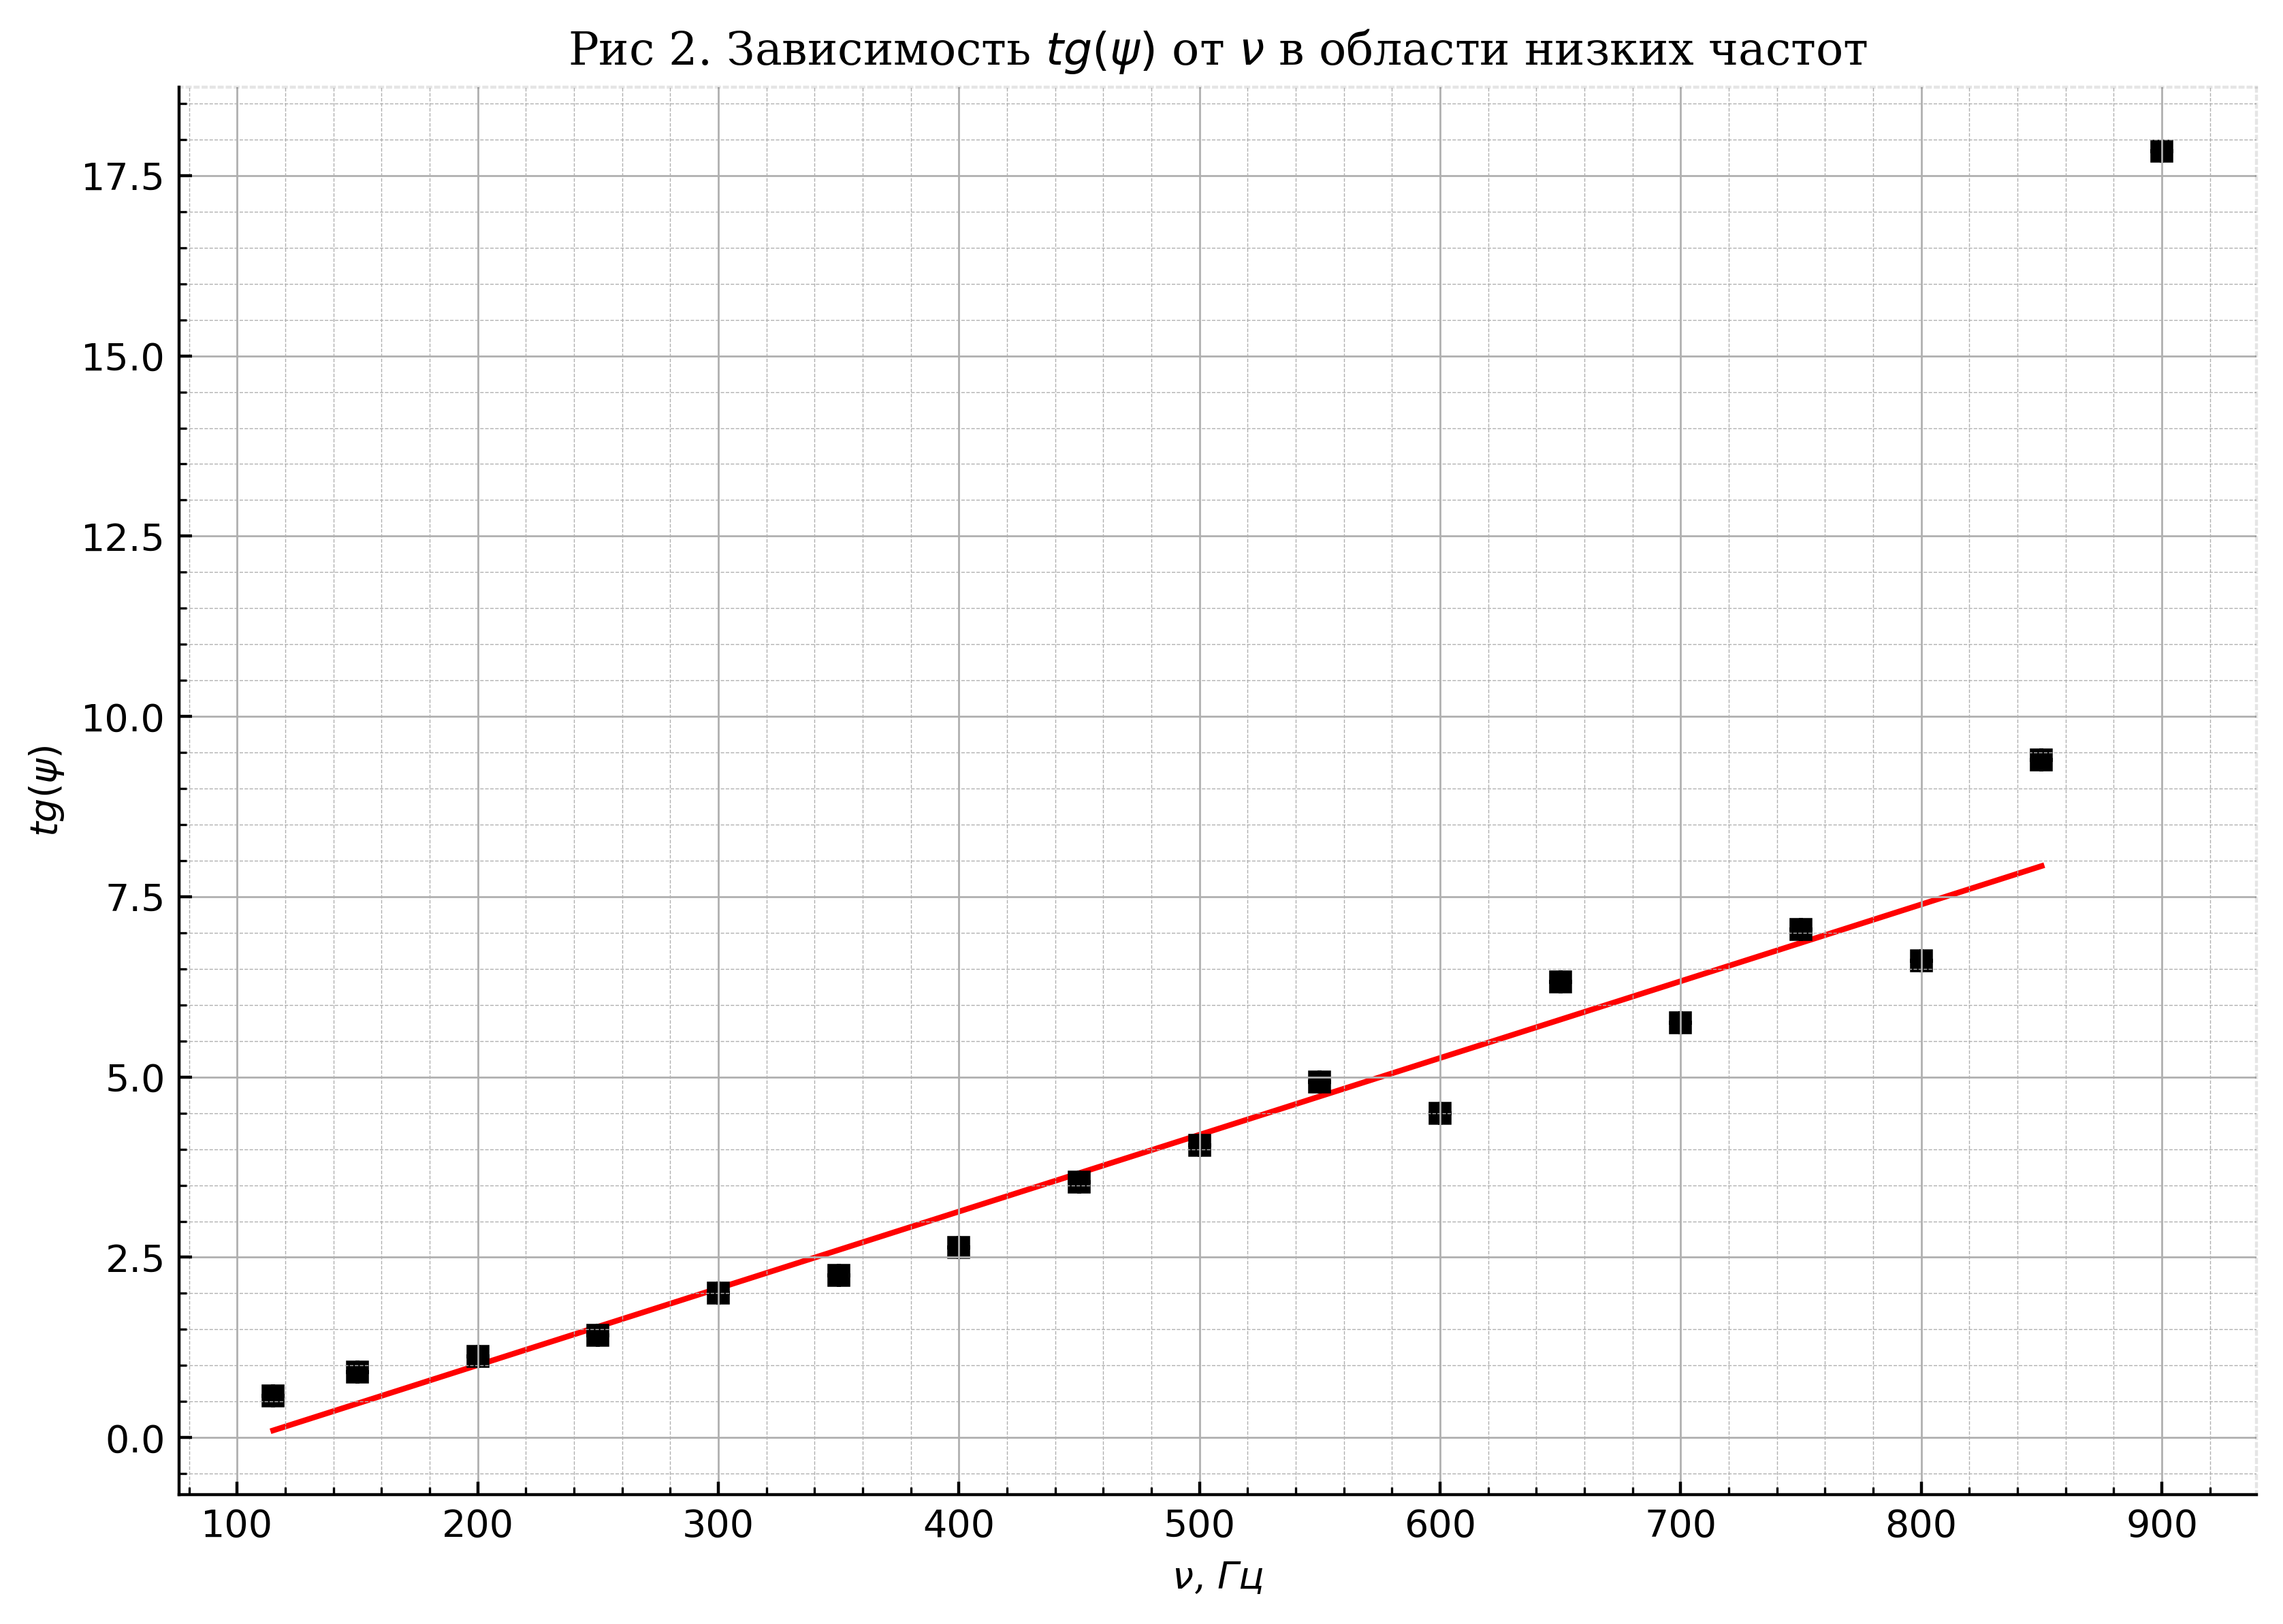

In [2]:
df = pd.read_csv('4.tsv', sep='\t')

df['psi'] -= np.pi/2

X = np.array( df['v, Hz'][:-3] )
Y = np.array( np.tan(-df['psi'])[:-3] )

fig2 = mg.make_figure(dpi_mode='high')
ax2 = fig2.add_subplot()
mg.set_grids(fig2)
mg.set_title(ax2, r'Зависимость $tg(\psi)$ от $\nu$ в области низких частот')
mg.set_label(ax2, r'$\nu$, $Гц$', r'$tg(\psi)$')

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax2, df['v, Hz'][:-2], np.array( np.tan(-df['psi'])[:-2] ))
mg.display_linls(ax2)

a = (45-1.5)*1e-3
h = 1.5e-3
u0 = 4*np.pi*1e-7
sigma = k/a/h/np.pi/u0
print(f'Проводимость {sigma:.2E}')
beta = 1/np.pi/a/h/u0
s_sig = beta*s_k
print(f's_sigma = {s_sig / 1e7}')

Коэффиценты прямой: k, s_k, b, s_b
0.021200192150353354	0.00030670374542028704	-3.117994426610404	0.01202273498333638
Проводимость 5.06E+07
s_sigma = 0.14640186783813103


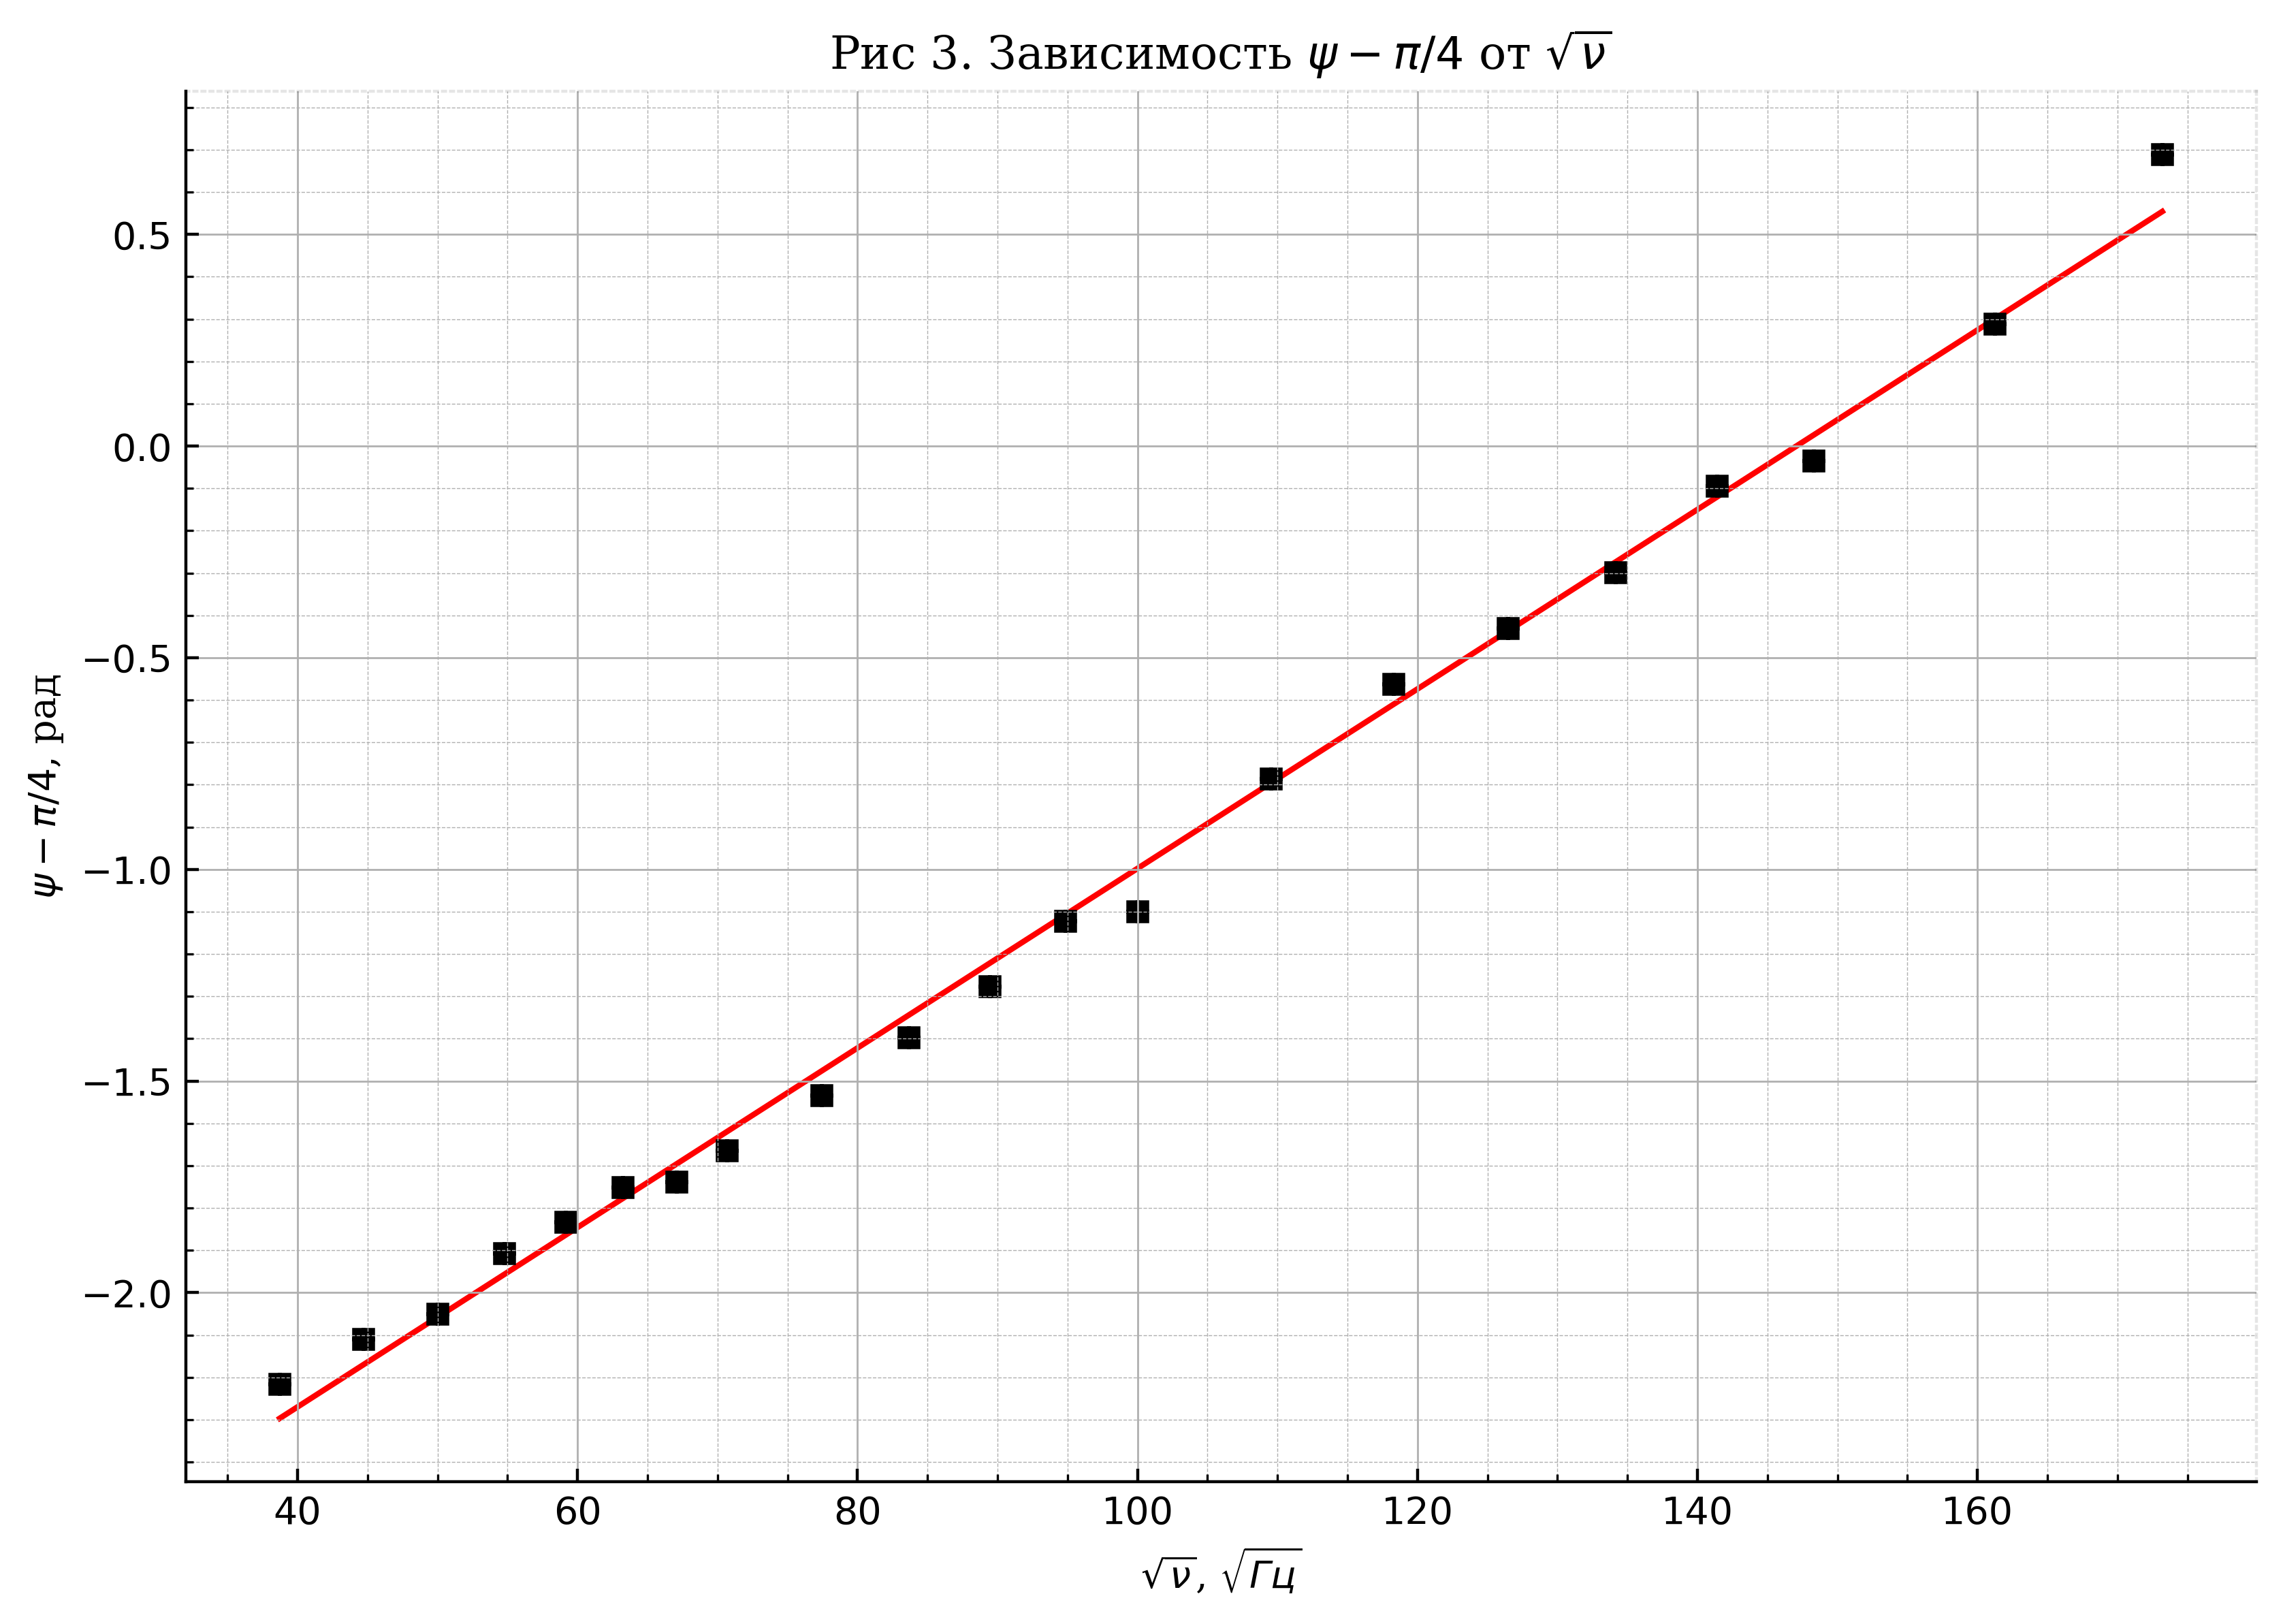

In [3]:
df = pd.read_csv('5.tsv', sep='\t')
df['psi'] -= np.pi / 2

X = np.array(np.sqrt( df['v, Hz'] ))
Y = np.array(df['psi'] - np.pi/4)

fig3 = mg.make_figure(dpi_mode='high')
ax3 = fig3.add_subplot()
mg.set_grids(fig3)
mg.set_title(ax3, r'Зависимость $\psi - \pi/4$ от $\sqrt{\nu}$')
mg.set_label(ax3, r'$\sqrt{\nu}$, $\sqrt{Гц}$', r'$\psi - \pi/4$, рад')

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax3, X, Y)
mg.display_linls(ax3)

h = 1.5e-3
u0 = 4*np.pi*1e-7
value = k/h
sigma = value**2 / np.pi / u0
print(f'Проводимость {sigma:.2E}')

s_s = 2*k*s_k/(h*h*np.pi*u0)
print(f's_sigma = {s_s/1e7}')

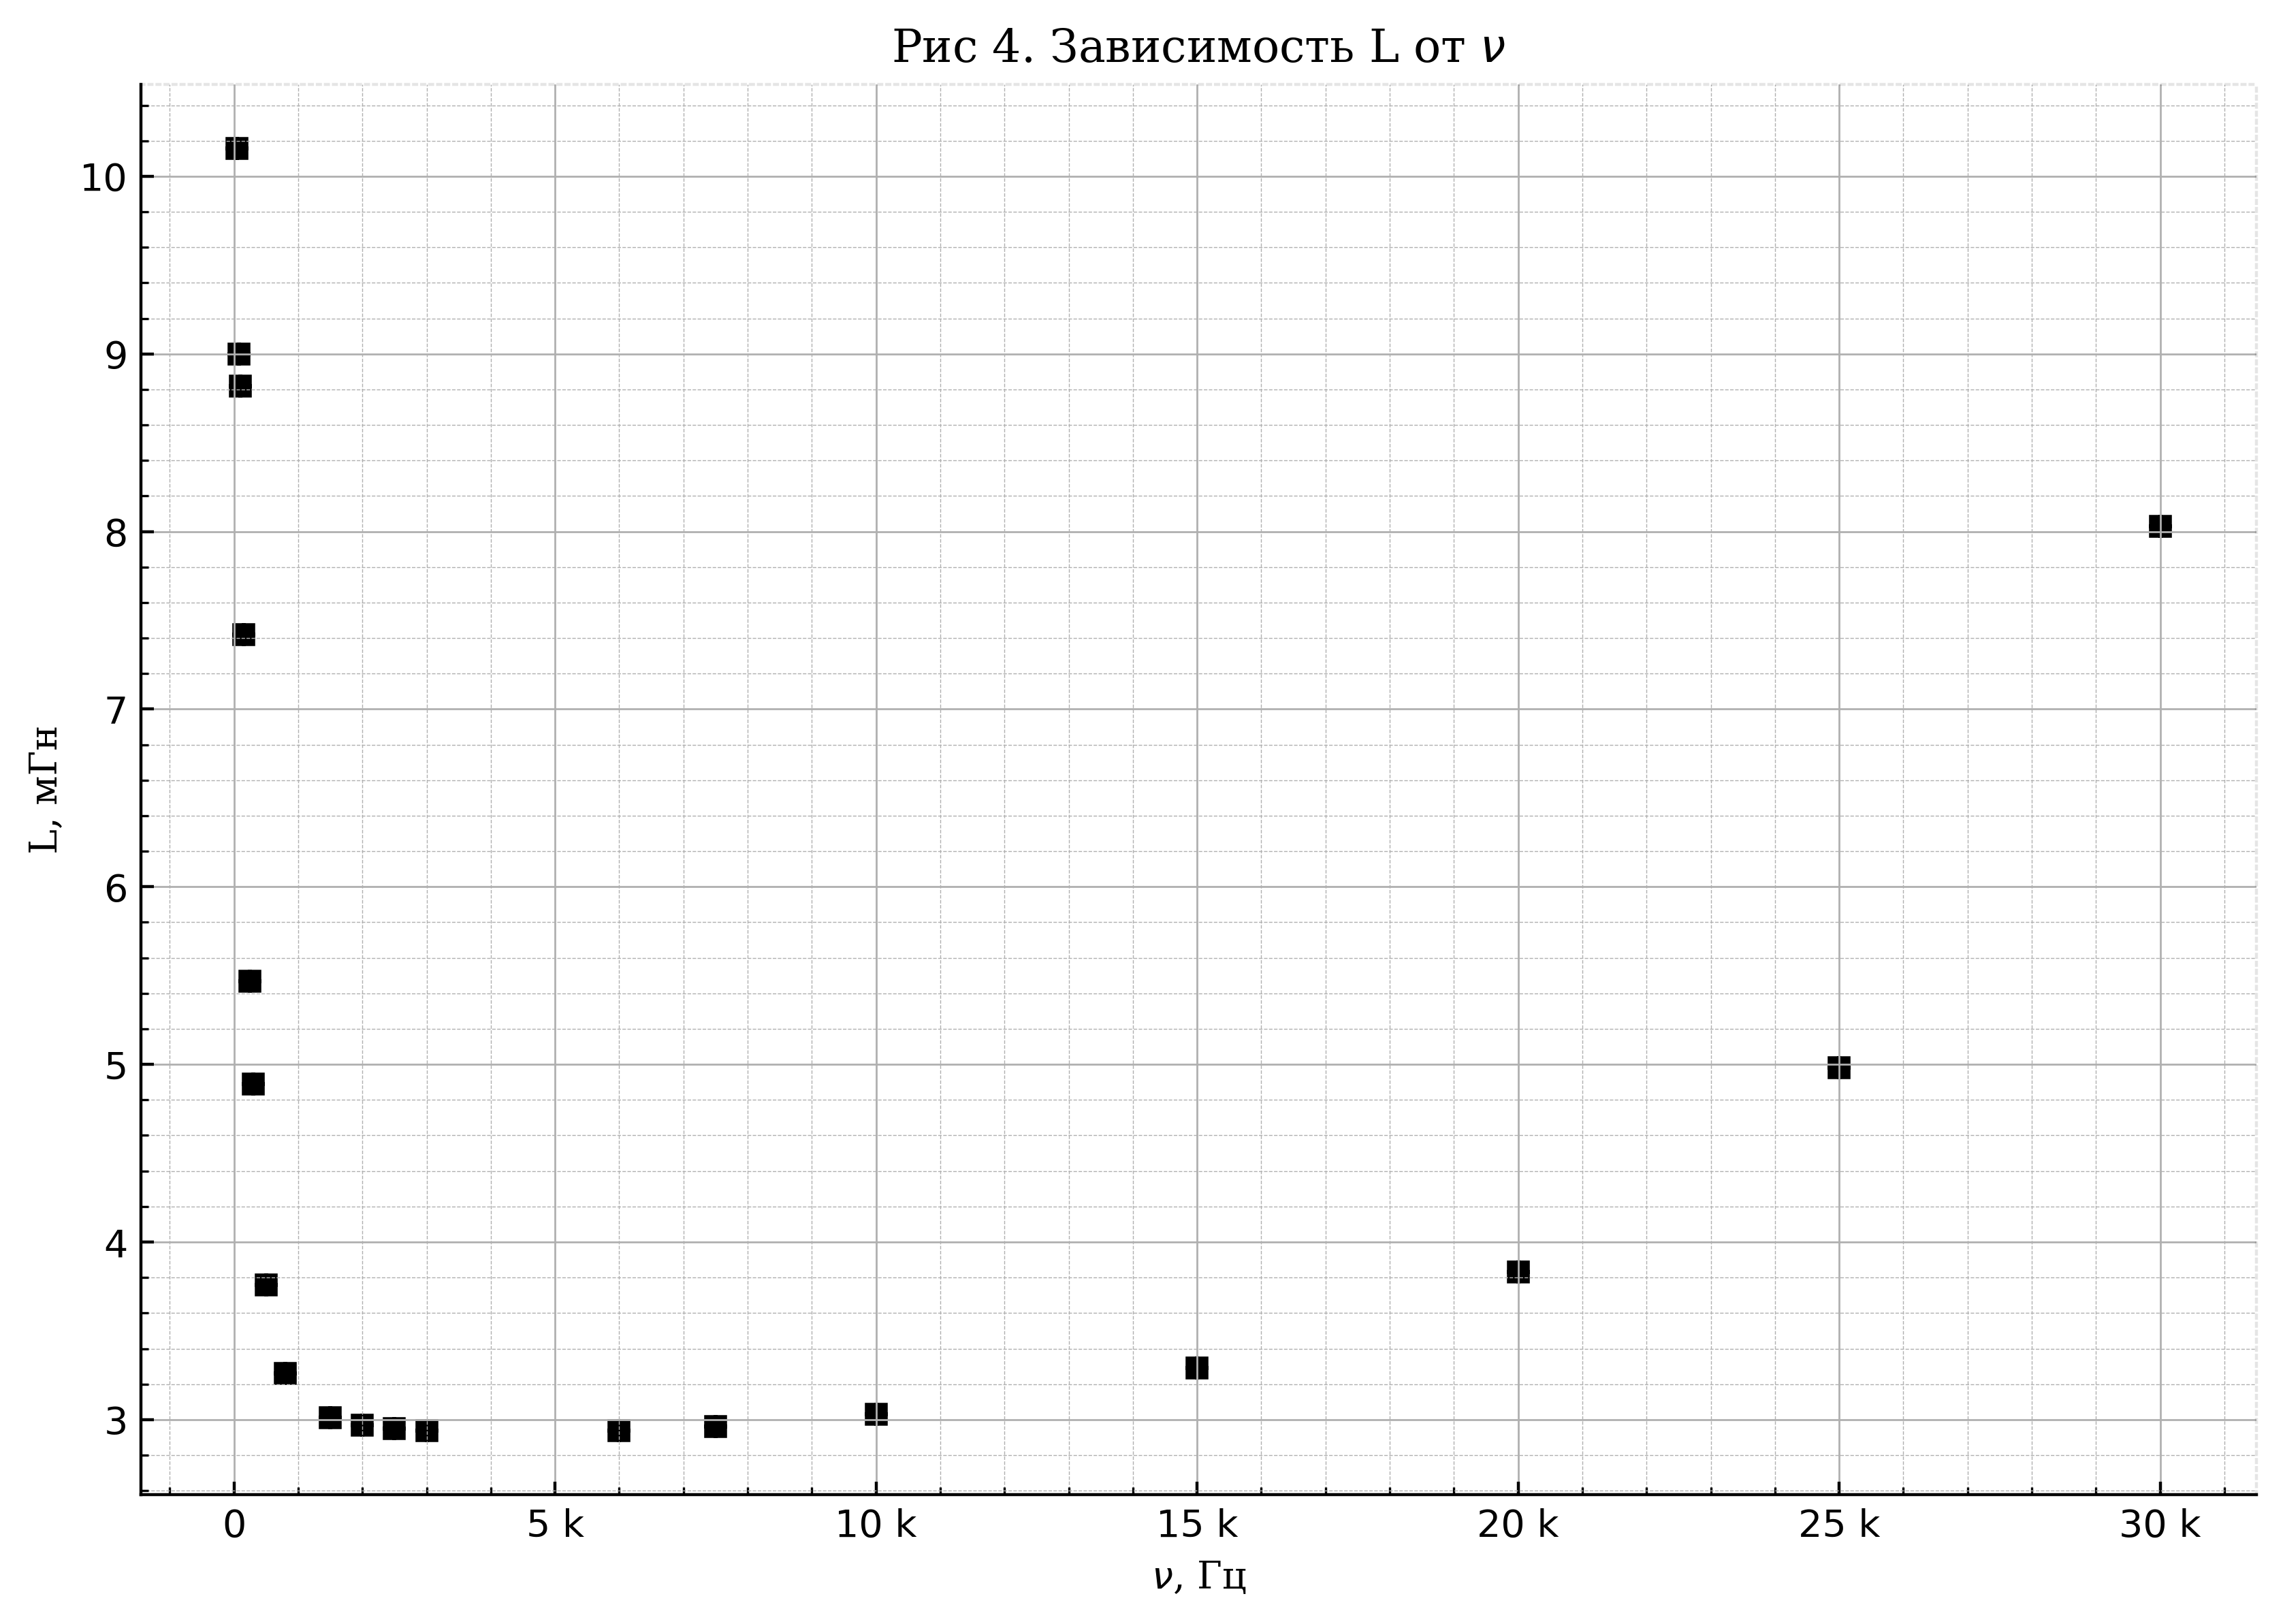

In [4]:
df = pd.read_csv('6.tsv', sep='\t')

X = np.array(df['v, Hz'])
Y = np.array(df['L, mH']) 

fig4 = mg.make_figure(dpi_mode='high')
ax4 = fig4.add_subplot()
ax4.xaxis.set_major_formatter(formatter1)
mg.set_grids(fig4)
mg.set_title(ax4, r'Зависимость L от $\nu$')
mg.set_label(ax4, r'$\nu$, Гц', r'L, мГн')

#k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax4, X, Y)
# mg.display_linls(ax4)

Коэффиценты прямой: k, s_k, b, s_b
3.2676404376006215e-05	2.4413963437005176e-07	-0.1546365403597676	0.050190250432453565
Проводимость 2.22E+07
s_sigma = 0.008289930899056303


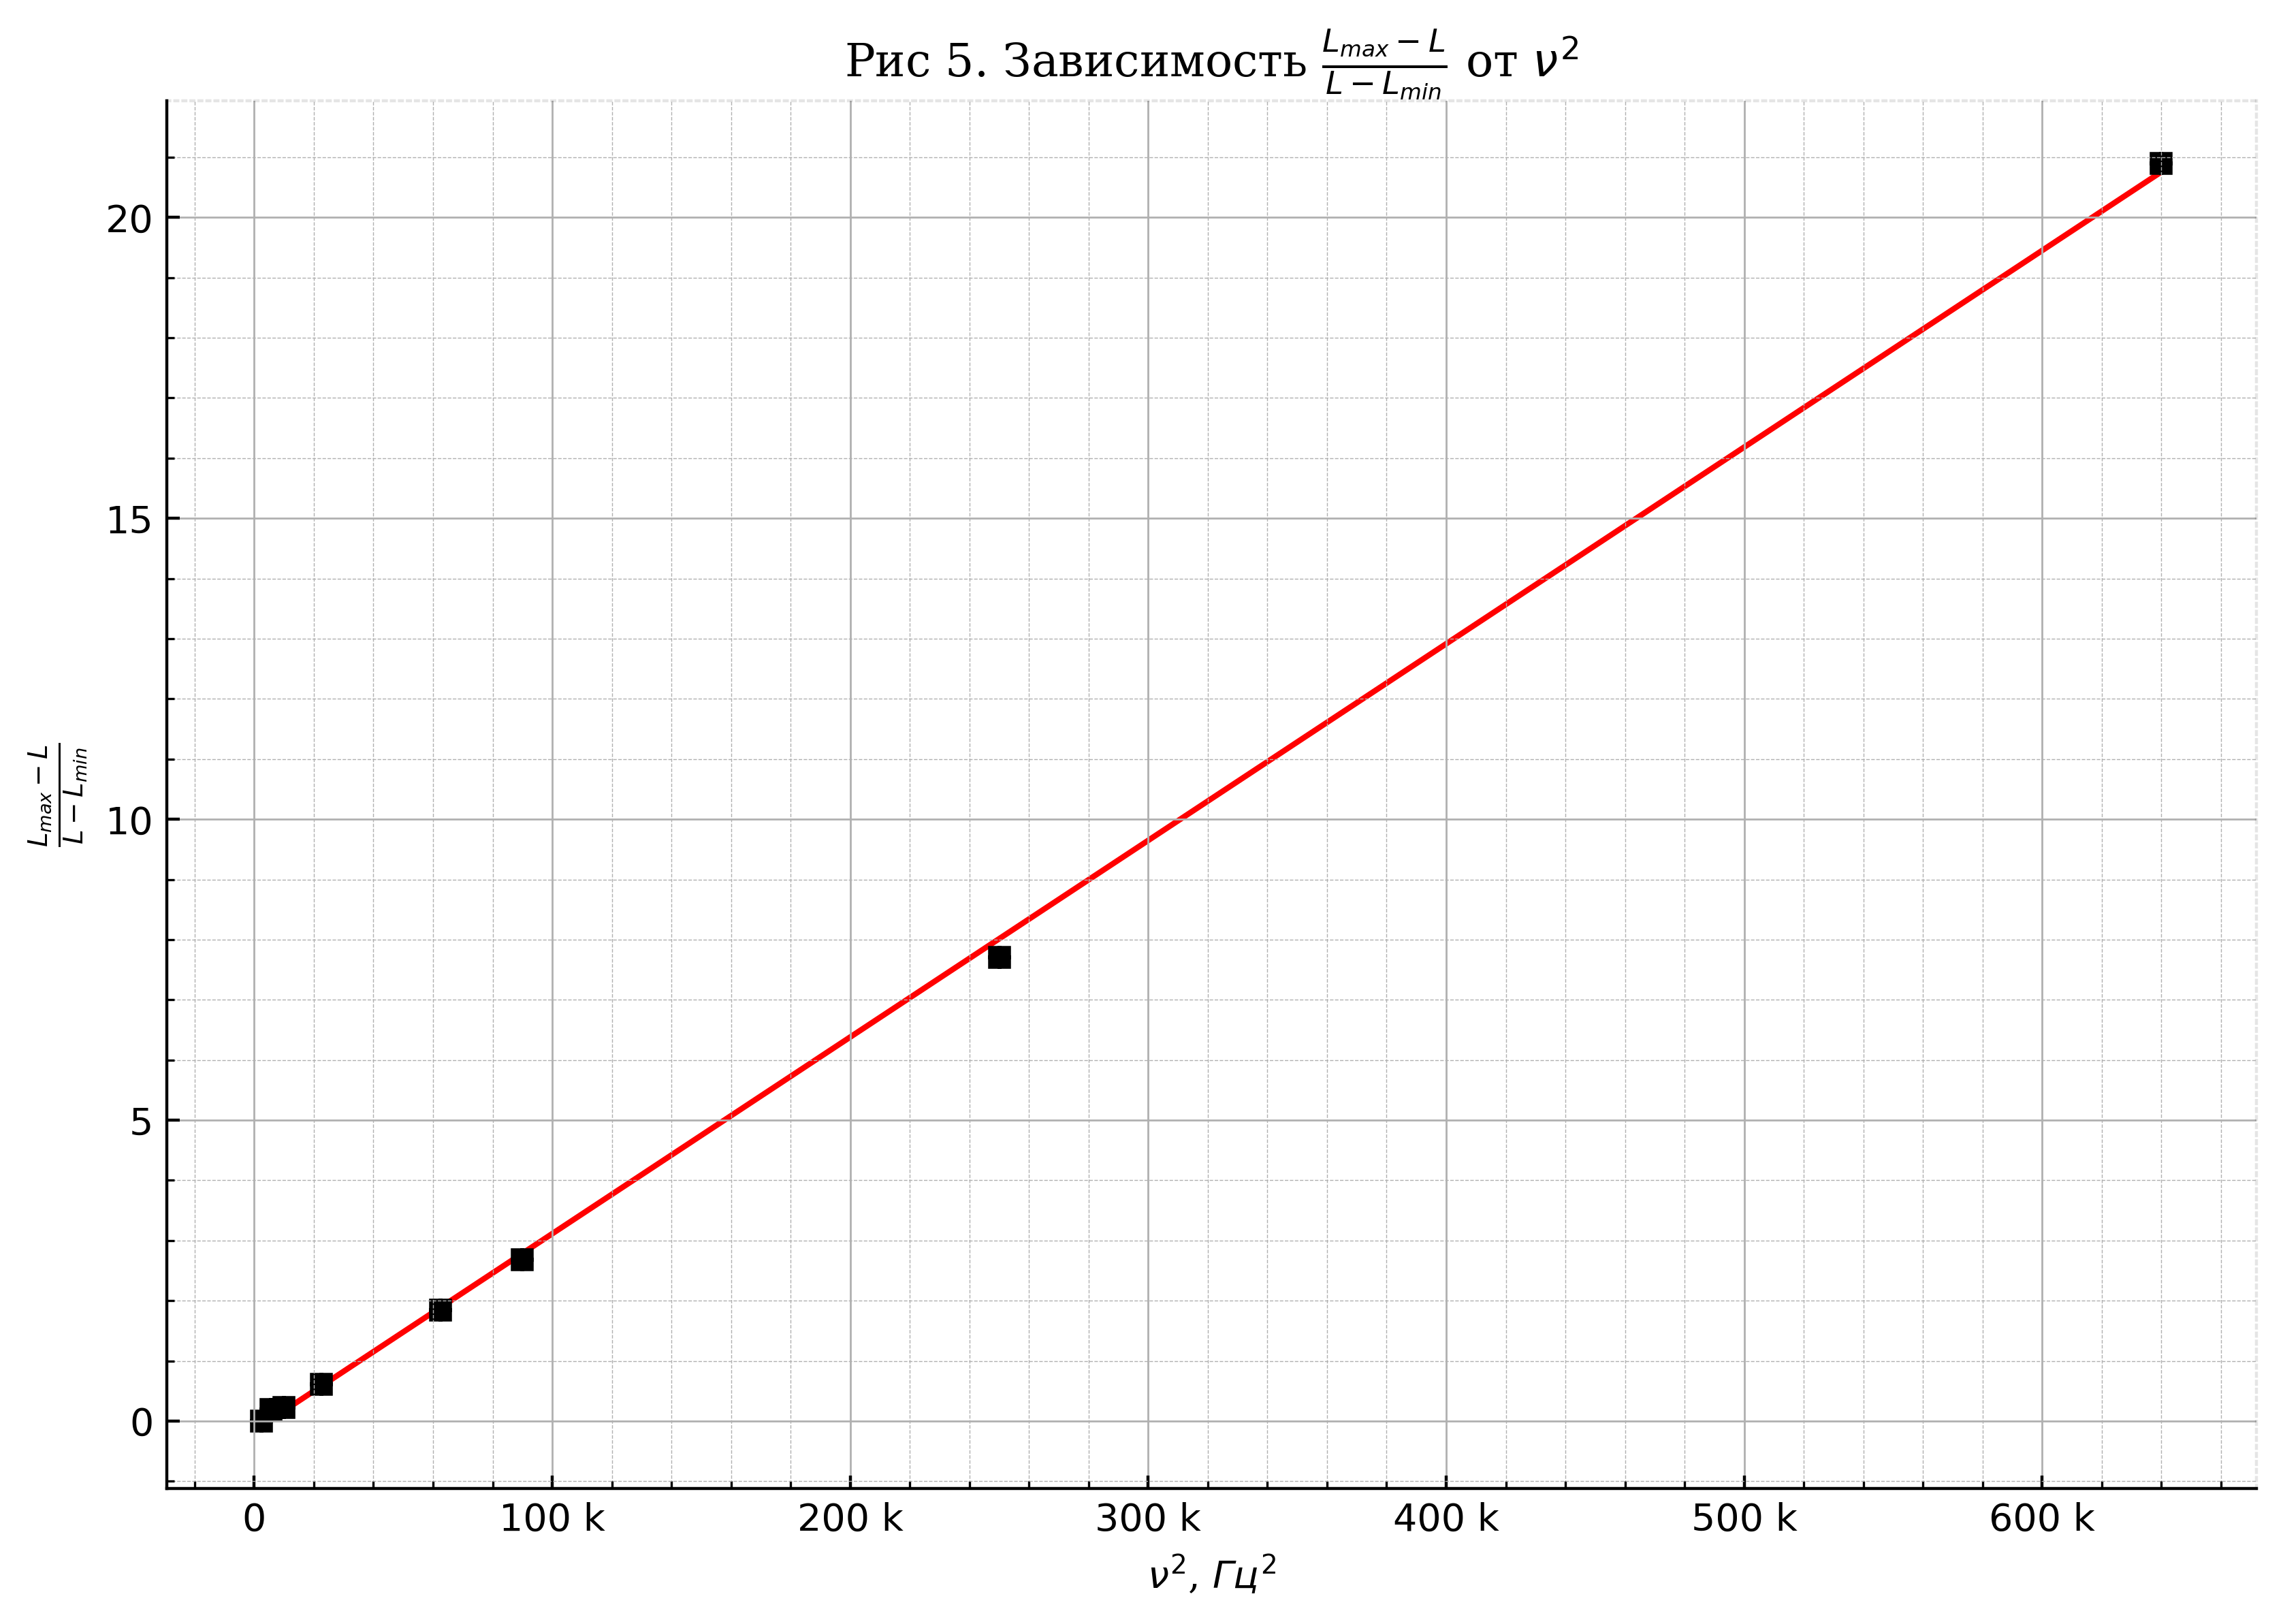

In [5]:
L_max = 10.155 # mH
L_min = 2.93 # mH

X = np.array(np.square(df['v, Hz']))[:-11]
Y = np.array(
    ( L_max - df['L, mH'] ) /
    ( df['L, mH'] - L_min )
    )[:-11]

fig5 = mg.make_figure(dpi_mode='high')
ax5 = fig5.add_subplot()
ax5.xaxis.set_major_formatter(formatter1)
mg.set_grids(fig5)
mg.set_title(ax5, r'Зависимость $\frac{L_{max} - L}{L - L_{min}}$ от $\nu^2$')
mg.set_label(ax5, r'$\nu^2$, $Гц^2$', r'$\frac{L_{max} - L}{L - L_{min}}$')

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax5, X, Y)
mg.display_linls(ax5)

value = np.sqrt(k)
sigma = value / np.pi / a / h / u0
print(f'Проводимость {sigma:.2E}')

s_si = s_k/(np.pi*a*h*u0*2*np.sqrt(k))
print(f's_sigma = {s_si/1e7}')

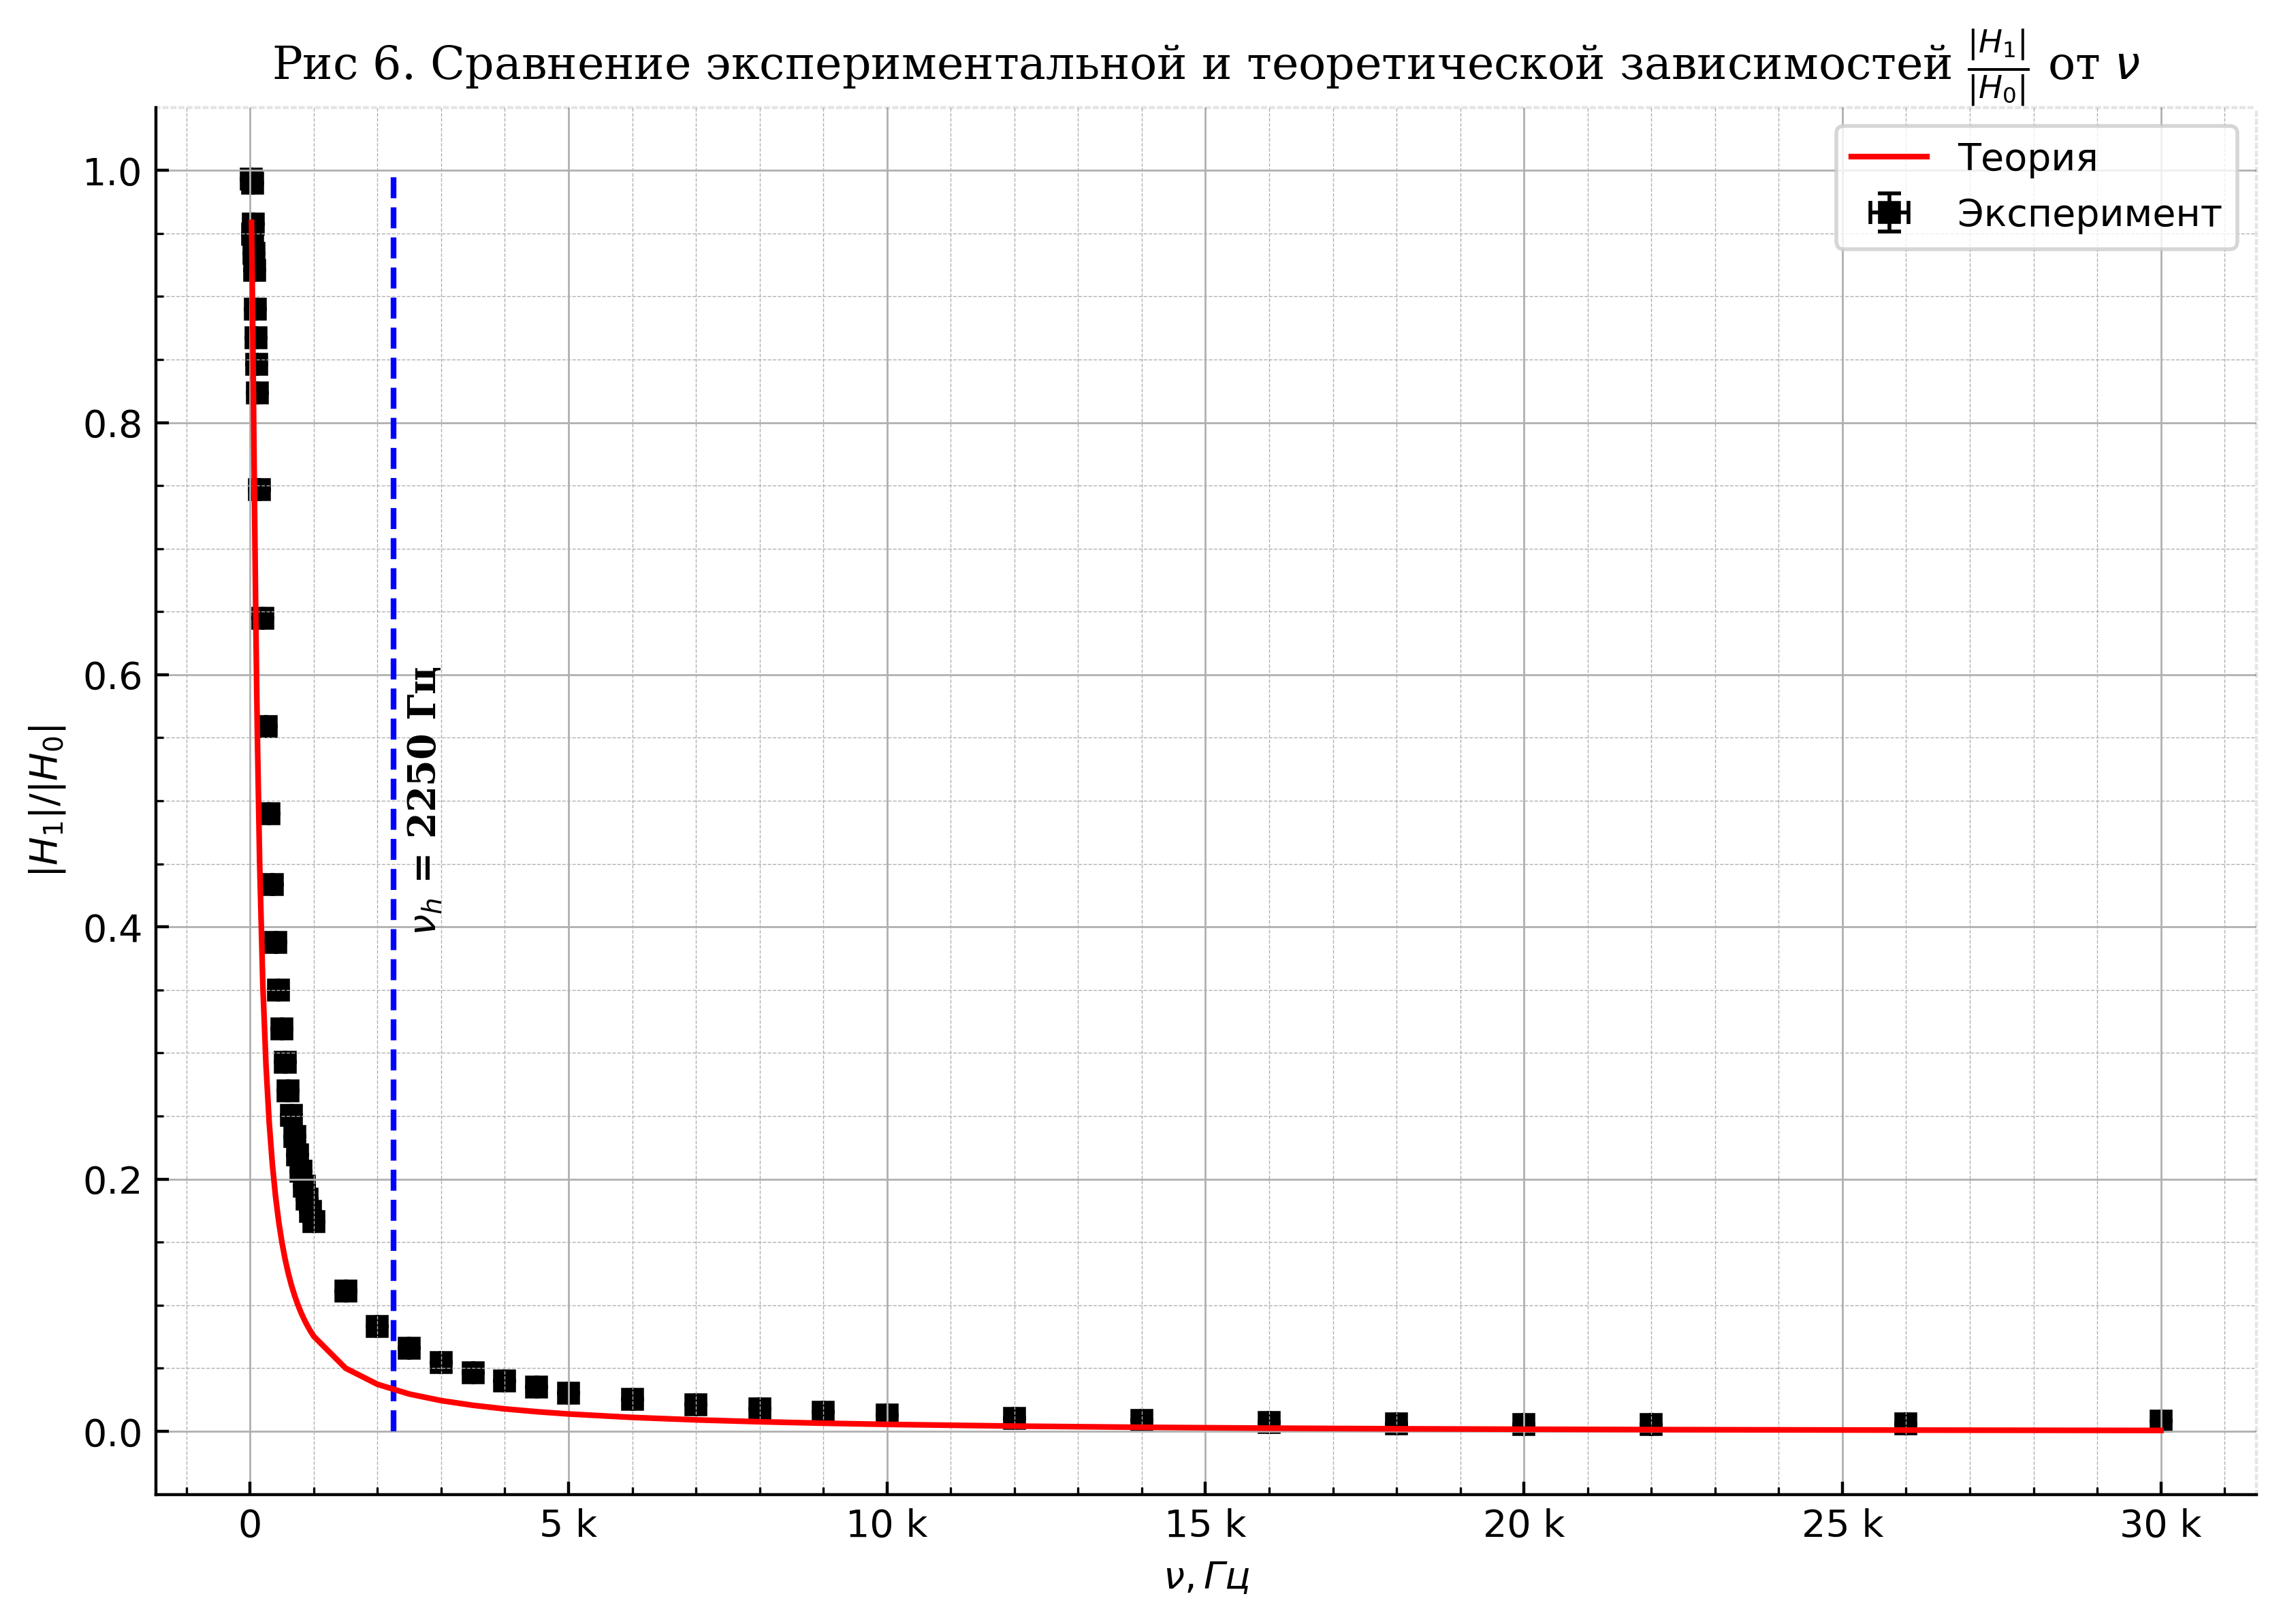

In [6]:
df = pd.read_csv('all.tsv', sep='\t')
from decimal import *

SIGMA = 5e7
#beta = np.sqrt( np.pi*df['v, Hz']*SIGMA ) * h
#Re = np.cosh(beta)*np.cos(beta) + beta*np.cos(beta)*(np.sinh(beta) - np.cosh(beta))/2/h
#Im = np.sinh(beta)*np.sin(beta) + beta*np.cos(beta)*(np.cosh(beta) + np.sinh(beta))/2/h
#mod_z = np.sqrt( np.square(Re) + np.square(Im) )

alphas = []
for v in df['v, Hz']:
    absol = np.sqrt(np.pi*v*SIGMA*u0)
    alphas.append( complex(absol, absol) )
alphas = np.array(alphas)
Z = 1/( np.cosh(alphas*h) + 1/2*alphas*a*np.sinh(alphas*h) )
Y_t = np.abs(Z)

A = 68.75
X = np.array( df['v, Hz'] ) 
Y = np.array( A*df['U, V']/df['v, Hz']/df['I, mA']*1e3 )
fig6 = mg.make_figure(dpi_mode='high')
ax6 = fig6.add_subplot()
ax6.xaxis.set_major_formatter(formatter1)
mg.set_grids(fig6)
mg.set_title(ax6, r'Сравнение экспериментальной и теоретической зависимостей $\frac{|H_1|}{|H_0|}$ от $\nu$')
mg.set_label(ax6, r'$\nu, Гц$', r'$|H_1|/|H_0|$')

font = {'fontname': 'DejaVu Serif'}
mg.draw_errorbar(ax6, X, Y, label='Эксперимент')
ax6.plot((2251,2251),(0, 1), c='blue', linestyle='--', zorder=2)
ax6.text(2251+200, 0.4, r'$\nu_h$ = 2250 Гц', color='k', rotation=90, fontweight='black', **font)
ax6.plot(X, Y_t, c='r', label='Теория')

ax6.legend()

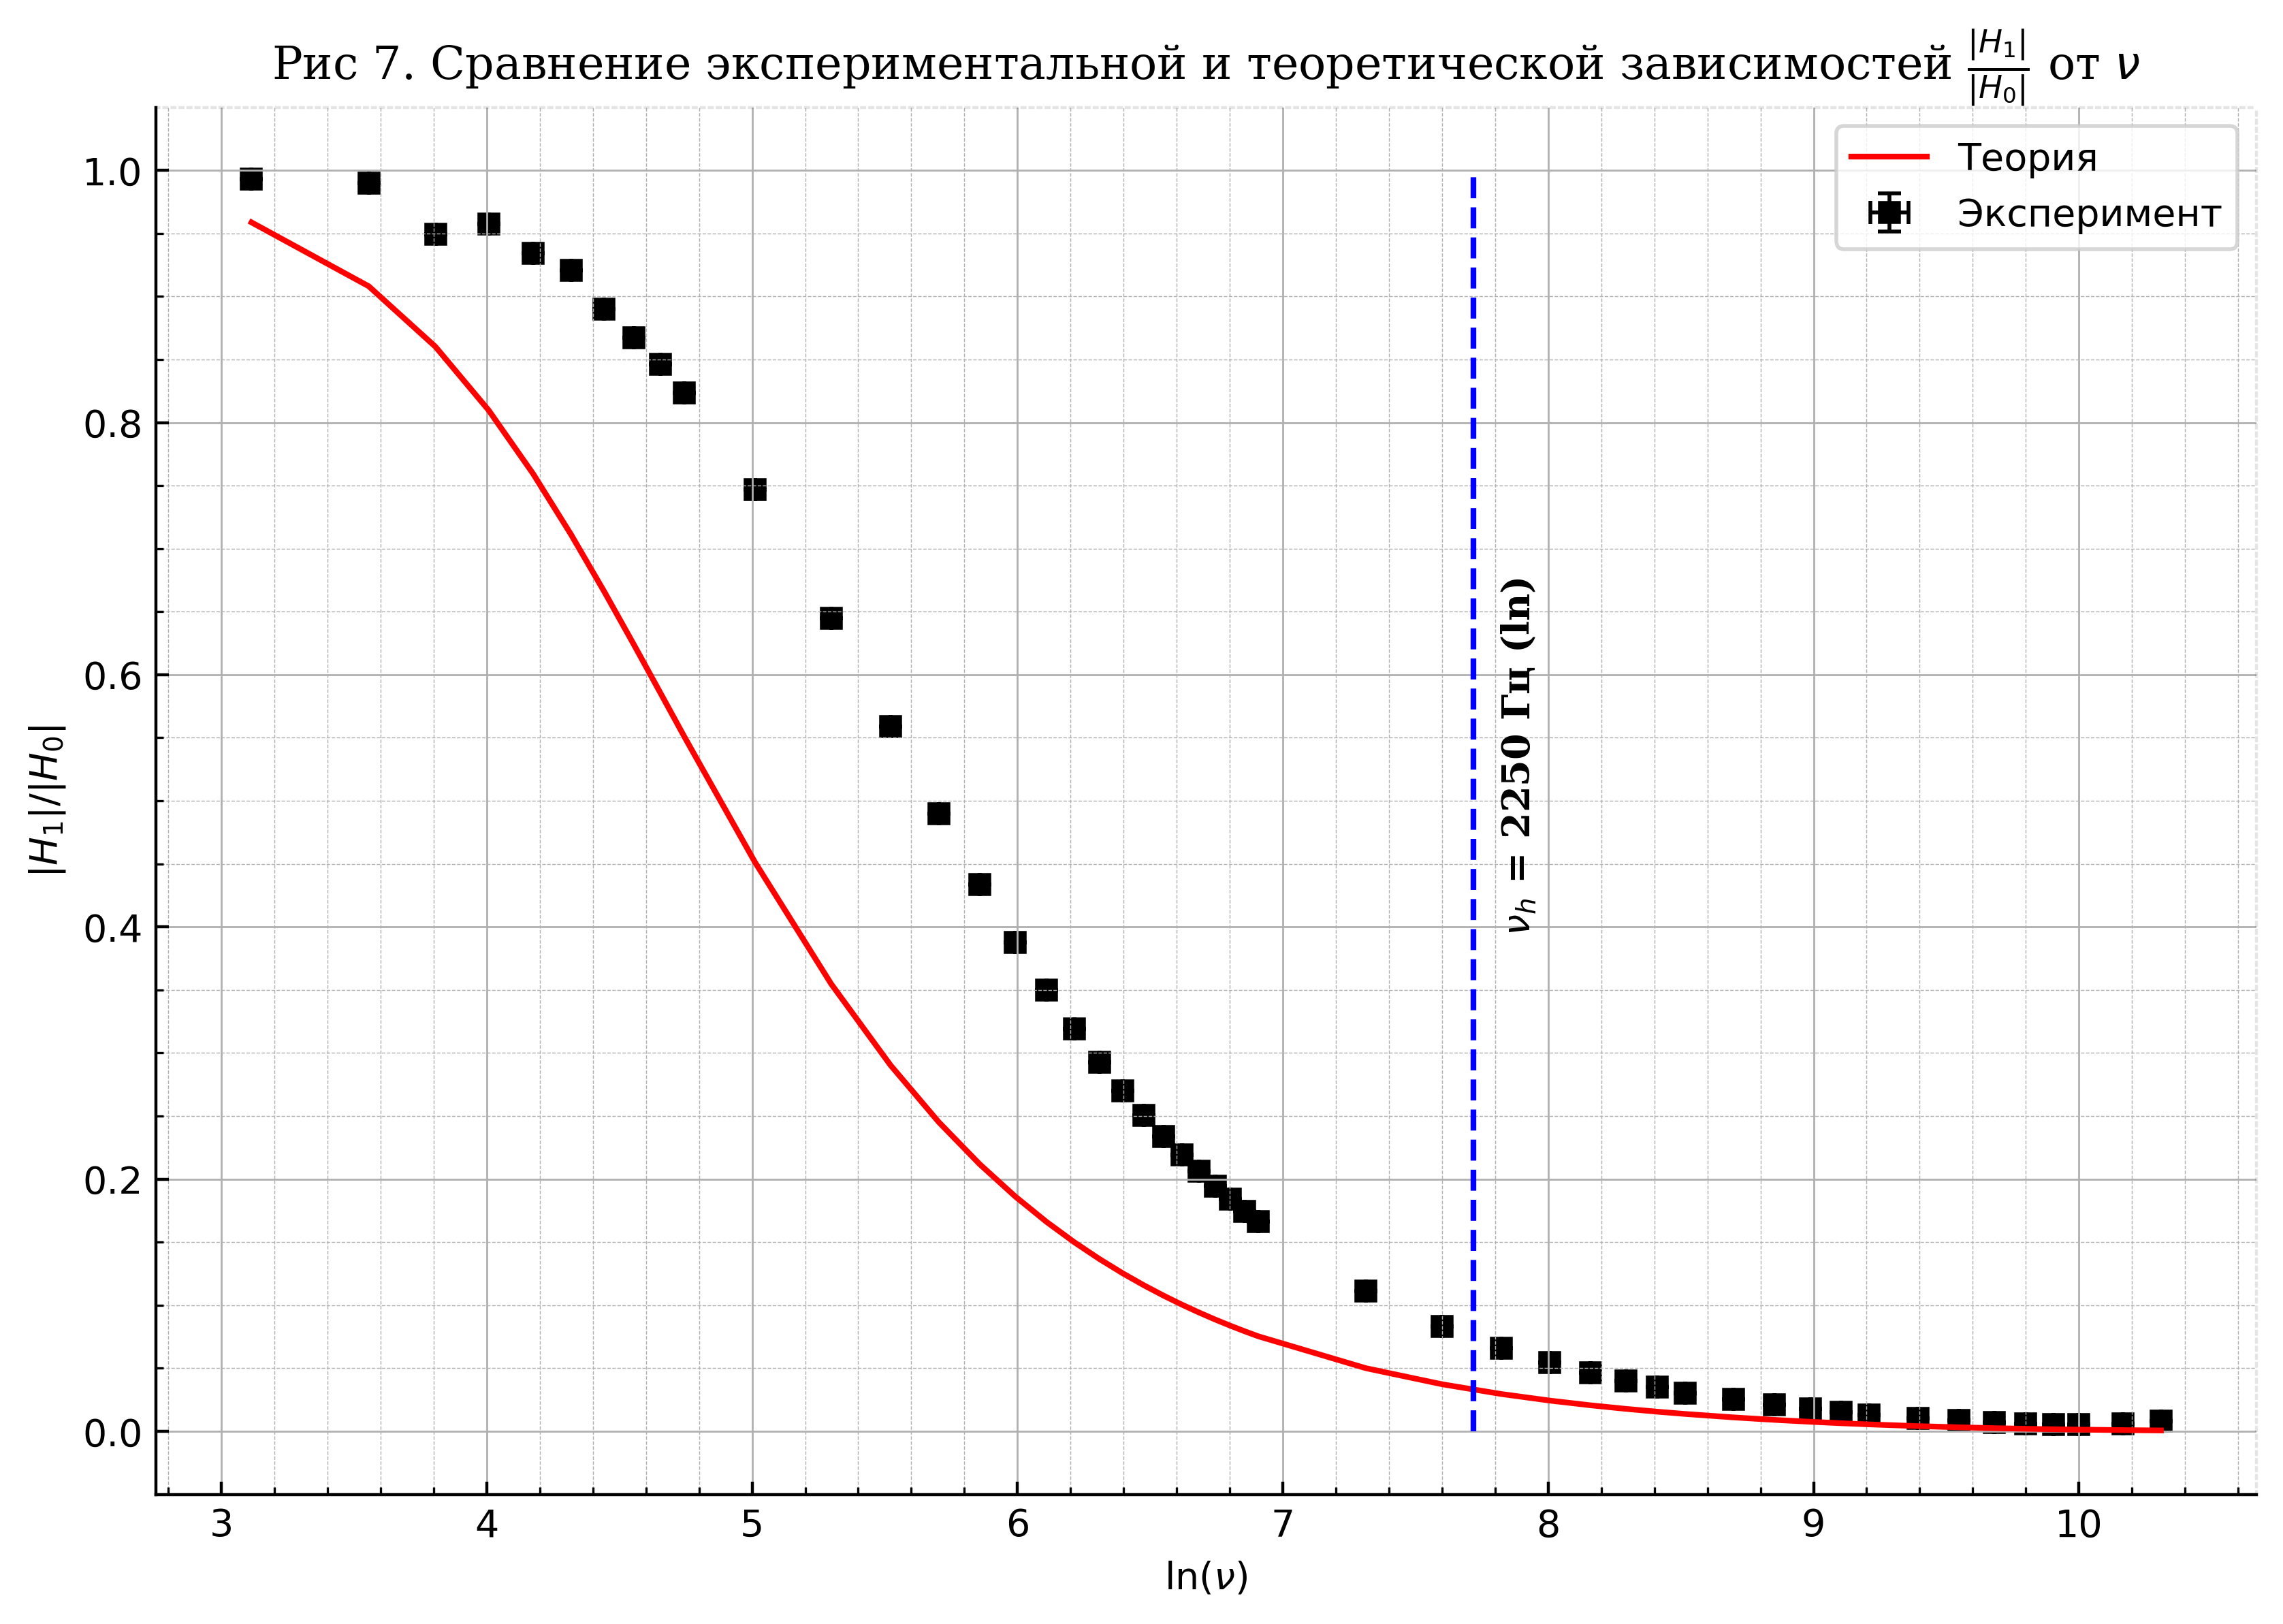

In [7]:
X = np.log(np.array( df['v, Hz'] ))

fig7 = mg.make_figure(dpi_mode='high')
ax7 = fig7.add_subplot()
mg.set_grids(fig7)
mg.set_title(ax7, r'Сравнение экспериментальной и теоретической зависимостей $\frac{|H_1|}{|H_0|}$ от $\nu$')
mg.set_label(ax7, r'$\ln(\nu)$', r'$|H_1|/|H_0|$')

mg.draw_errorbar(ax7, X, Y, label='Эксперимент')
#ax7.plot((2251,2251),(0, 1), c='blue', linestyle='--', zorder=2)
#ax7.text(2251+100, 0.5, r'$\nu_h$ = 2251 Гц', color='k', rotation=90, **font)
ax7.plot(X, Y_t, c='r', label='Теория')

ax7.plot((np.log(2251),np.log(2251)),(0, 1), c='blue', linestyle='--', zorder=2)
ax7.text(np.log(2251) + 0.1, 0.4, r'$\nu_h$ = 2250 Гц (ln)', color='k', rotation=90, fontweight='black', **font)

font = {'fontname': 'DejaVu Serif'}
ax7.legend()